## 深度学习基本概念

## 多元线性回归

多个特征

线性回归算法是机器学习中最简单的回归类算法，多元线性回归指的就是一个样本对应多个特征的线性
回归问题。假设我们的数据现在就是二维表，对于一个有 个特征的样本 而言，它的预测结果可以写作
一个几乎人人熟悉的方程：
和 被统称为模型的权重，其中 被称为截距(intercept)，也叫做偏差(bias)， ~ 被称为回归系数
(regression coefficient)，也叫作权重(weights)， ~ 是样本 上的不同特征。这个表达式，其实就
和我们小学时就无比熟悉的 是同样的性质。其中 被我们称为因变量，在线性回归中表示为
，在机器学习中也就表现为我们的标签。如果写作 ，则代表真实标签。如果写作 （读作z帽或者
zhat），则代表预测出的标签。模型得出的结果，一定是预测的标签。

In [5]:
import torch
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype = torch.float32)
z = torch.tensor([-0.2, -0.05, -0.05, 0.1])
X

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 0., 1.],
        [1., 1., 1.]])

In [6]:
w = torch.tensor([-0.2,0.15,0.15])
def LinearR(X,w):
    zhat = torch.mv(X,w)
    return zhat
zhat = LinearR(X,w)# 注意x是浮点型
zhat

tensor([-0.2000, -0.0500, -0.0500,  0.1000])

In [7]:
#导入库
import torch
#首先生成特征张量
X = X.float()
X

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 0., 1.],
        [1., 1., 1.]])

In [9]:
SSE = sum((zhat - z)**2)
SSE

tensor(8.3267e-17)

In [25]:
torch.set_printoptions(precision=33)
SSE

tensor(8.326672684688674053177237510681152e-17)

In [11]:
preds = torch.ones(300, 68, 64, 64)
preds.sum()

tensor(83558400.)

In [14]:
preds = torch.ones(300, 68, 64, 64, dtype=torch.float64) * 0.1
preds.sum() * 10

tensor(83558400.000000059604644775390625000000, dtype=torch.float64)

In [15]:
torch.allclose(zhat,z) # 允许误差范围，默认1e-5,实际不常用

True

## torch.nn.Linear实现单层回归神经网络的正向传播

In [17]:
import torch
X = torch.tensor([[0,0],[1,0],[0,1],[1,1]], dtype = torch.float32)
output = torch.nn.Linear(2,1) # 特征个数，输出特征个数和第二维无关
# 会自动随机生成对应的w和b
zhat = output(X)
zhat

tensor([[ 0.410525500774383544921875000000],
        [ 0.104242086410522460937500000000],
        [-0.014163076877593994140625000000],
        [-0.320446491241455078125000000000]], grad_fn=<AddmmBackward0>)

In [18]:
output.weight

Parameter containing:
tensor([[-0.306283414363861083984375000000, -0.424688577651977539062500000000]],
       requires_grad=True)

In [19]:
output.bias

Parameter containing:
tensor([0.410525500774383544921875000000], requires_grad=True)

In [ ]:
output = torch.nn.Linear(2,1，bias=False) # bias不会生成


In [20]:
torch.random.manual_seed(420) #人为设置随机数种子 ，则随机数固定

## 二分类神经网络：逻辑回归

逻辑回归：参考资料详细

In [21]:
import torch
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype = torch.float32)
andgate = torch.tensor([[0],[0],[0],[1]], dtype = torch.float32)
w = torch.tensor([-0.2, 0.15,0.15],dtype =torch.float32)
def LogisticR(X,w):
    zhat = torch.mv(X,w)
    sigma = 1/(1+torch.exp(-zhat))
    #sigma = torch.sigmoid(zhat)
    andhat = torch.tensor([int(x) for x in sigma >= 0.5], dtype = torch.float32)
    return sigma, andhat
sigma, andhat = LogisticR(X,w)
sigma

tensor([0.450166016817092895507812500000, 0.487502634525299072265625000000,
        0.487502634525299072265625000000, 0.524979174137115478515625000000])

## 符号函数sign，ReLU，Tanh

 ## torch.functional实现单层二分类神经网络的正向传播

In [22]:
import torch
from torch.nn import functional as F
X = torch.tensor([[0,0],[1,0],[0,1],[1,1]], dtype = torch.float32)
torch.random.manual_seed(420) #人为设置随机数种子
dense = torch.nn.Linear(2,1)
zhat = dense(X)
sigma = F.sigmoid(zhat)
y = [int(x) for x in sigma > 0.5] # 随机生成的结果
y

E:\anaconda\envs\ts_env\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1, 1, 1, 1]

In [ ]:
F.relu(zhat)
torch.tanh(zhat)
torch.tanh(zhat)

# 多分类神经网络：Softmax回归

In [23]:
z = torch.tensor([3,3.5,2], dtype=torch.float32)
torch.softmax(z,dim=0)

tensor([0.331498950719833374023437500000, 0.546549379825592041015625000000,
        0.121951654553413391113281250000])

In [26]:
z = torch.tensor([[[1,2,4,5],[3,4,4,5],[5,6,4,5]]
                  ,[[5,6,4,5],[7,8,4,5],[9,10,4,5]]], dtype=torch.float32)
torch.softmax(z,0)  #对应维度之和为1

tensor([[[0.017986210063099861145019531250000,
          0.017986210063099861145019531250000,
          0.500000000000000000000000000000000,
          0.500000000000000000000000000000000],
         [0.017986210063099861145019531250000,
          0.017986210063099861145019531250000,
          0.500000000000000000000000000000000,
          0.500000000000000000000000000000000],
         [0.017986210063099861145019531250000,
          0.017986210063099861145019531250000,
          0.500000000000000000000000000000000,
          0.500000000000000000000000000000000]],

        [[0.982013761997222900390625000000000,
          0.982013761997222900390625000000000,
          0.500000000000000000000000000000000,
          0.500000000000000000000000000000000],
         [0.982013761997222900390625000000000,
          0.982013761997222900390625000000000,
          0.500000000000000000000000000000000,
          0.500000000000000000000000000000000],
         [0.982013761997222900390625000000000,
      

# 深层神经网络

ValueError: 'c' argument has 4 elements, which is not acceptable for use with 'x' with size 4, 'y' with size 4.

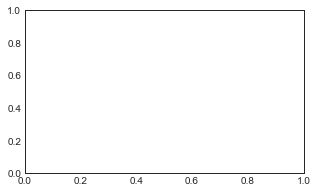

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype = torch.float32)

#设置一个画布
plt.style.use('seaborn-whitegrid') #设置图像的风格
sns.set_style("white")
plt.figure(figsize=(5,3)) #设置画布大小
plt.scatter(X[:,1],X[:,2] #散点图的横坐标和纵坐标
            ,c=andgate #颜色=真实标签的类别
            ,cmap="rainbow") #绘制散点图
plt.xlim(-1,3) #设置横纵坐标尺寸
plt.ylim(-1,3)
plt.title("AND GATE",fontsize=16) #设置图像标题
plt.grid(alpha=.4,axis="y") #显示背景中的网格
plt.gca().spines["top"].set_alpha(.0) #让上方和右侧的坐标轴被隐藏
plt.gca().spines["right"].set_alpha(.0);

ValueError: 'c' argument has 4 elements, which is not acceptable for use with 'x' with size 4, 'y' with size 4.

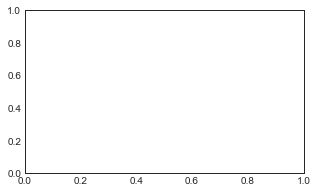

In [29]:
import numpy as np
x = np.arange(-1,3,0.5)
plt.plot(x,(0.23-0.15*x)/0.15 #这里是从直线的表达式变型出的x2 = 的式子
         ,color="k",linestyle="--");

In [32]:
import torch
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype = torch.float32)
andgate = torch.tensor([0,0,0,1], dtype = torch.float32)
def AND(X):
    w = torch.tensor([-0.2,0.15, 0.15], dtype = torch.float32)
    zhat = torch.mv(X,w)
    andhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
    return andhat
andhat = AND(X)
andgate

tensor([0., 0., 0., 1.])

In [ ]:
def XOR(X):
    #输入值：
    input_1 = X
    #中间层：
    sigma_nand = NAND(input_1)
    sigma_or = OR(input_1)
    x0 = torch.tensor([[1],[1],[1],[1]],dtype=torch.float32)
    #输出层：
    input_2 = torch.cat((x0,sigma_nand.view(4,1),sigma_or.view(4,1)),dim=1)
    y_and = AND(input_2)
    #print("NANE:",y_nand)
    #print("OR:",y_or)
    return y_and


## 激活函数

数我们在之前的课程中已经全部给大家介绍完毕。在这里，我们将总结性声明一下输出层的g(z)与隐藏层
的h(z)之间的区别，以帮助大家获得更深的理解：
1. 虽然都是激活函数，但隐藏层和输出层上的激活函数作用是完全不一样的。输出层的激活函数
是为了让神经网络能够输出不同类型的标签而存在的。其中恒等函数用于回归，sigmoid函数用于
二分类，softmax用于多分类。换句说， 仅仅与输出结果的表现形式有关，与神经网络的效果
无关，也因此它可以使用线性的恒等函数。但隐藏层的激活函数就不同了，如我们之前尝试的
XOR，隐藏层上的激活函数 的选择会影响神经网络的效果，而线性的 是会让神经网络的结
构失效的。
2. 在同一个神经网络中， 与 可以是不同的，并且在大多数运行回归和多分类的神经网络时，
他们也的确是不同的。每层上的 可以是不同的，但是同一层上的激活函数必须一致。
我们可以通过下面的这段代码来实际体会一下， 影响模型效果，而 只影响模型输出结果的形式
的事实。之前我们曾经尝试过以下几种情况：

输出层的激活函数不影响网络结果，隐藏层的激活函数会影响模型的结果

## 从0实现深度神经网络的正向传播

假设我们有500条数据，20个特征，标签为3分类。我们现在要实现一个三层神经网络，这个神经网络的
架构如下：第一层有13个神经元，第二层有8个神经元，第三层是输出层。其中，第一层的激活函数是
relu，第二层是sigmoid。我们要如何实现它呢？来看代码：

In [1]:
#继承nn.Module类完成正向传播
import torch
import torch.nn as nn
from torch.nn import functional as F
#确定数据 

torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32)
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32) # 在012中取值

In [2]:
#继承nn.Modules类来定义神经网路的架构
class Model(nn.Module):
    #init：定义类本身，__init__函数是在类被实例化的瞬间就会执行的函数
    def __init__(self,in_features=10,out_features=2):
        super(Model,self).__init__() #super(请查找这个类的父类，请使用找到的父类替换现在的类
        self.linear1 = nn.Linear(in_features,13,bias=True) #输入层不用写，这里是隐藏层的第一层
        self.linear2 = nn.Linear(13,8,bias=True)
        self.output = nn.Linear(8,out_features,bias=True) # 需要偏差
    
    #__init__之外的函数，是在__init__被执行完毕后，就可以被调用的函数
    def forward(self, x):
        z1 = self.linear1(x)
        sigma1 = torch.relu(z1)
        z2 = self.linear2(sigma1)
        sigma2 = torch.sigmoid(z2)
        z3 = self.output(sigma2)
        sigma3 = F.softmax(z3,dim=1)
        return sigma3
input_ = X.shape[1] #特征的数目
output_ = len(y.unique()) #获得独一无二的数目，分类的数目
#实例化神经网络类
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)
#在这一瞬间，所有的层就已经被实例化了，所有随机的w和b也都被建立好了
#前向传播
net(X)
net.forward(X)

tensor([[0.4140, 0.3496, 0.2365],
        [0.4210, 0.3454, 0.2336],
        [0.4011, 0.3635, 0.2355],
        ...,
        [0.4196, 0.3452, 0.2352],
        [0.4153, 0.3455, 0.2392],
        [0.4153, 0.3442, 0.2405]], grad_fn=<SoftmaxBackward0>)

net.linear1.weight.shape #w X(500,20) _> (20,500)

In [ ]:
#查看输出的标签
sigma = net.forward(X)
sigma.max(axis=1)
#查看每一层上的权重w和截距b
net.linear1.weight
net.linear1

注意：子类集成后可以执行父类的方法，但是不能集成父类的属性(如果要，需要super)

In [ ]:
net.training #是否要用于训练
net.cuda() #将整个网络转移到GPU上来运行
net.cpu() #将整个网络转移到CPU上来运行

In [ ]:
net.apply() #对神经网络中所有的层，init函数中所有的对象都执行同样的操作

In [ ]:
def initial_0(m):
    print(m)
    if type(m) == nn.Linear:
        m.weight.data.fill_(0)
        print(m.weight)
        
net.apply(initial_0) # 使用0初始化模型权重 

In [ ]:
net.linear1.weight.data.fill_(0) # 获取某一层使其全部为零

In [ ]:
net.parameters() # 拓展到分层学习率
for param in net.parameters():
    print(param)